In [3]:
import pandas as pd 
import seaborn as sns

<h6>Checking how many built-in datasets are available in Seaborn 
so I can choose one to apply the Random Forest algo </h6>

In [5]:
data_set = sns.get_dataset_names()
data_set  

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [6]:
df = sns.load_dataset("diamonds") # that's I choose 
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [24]:
 df.columns.tolist() # checking the columns name In buit-in data-base


['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z']

The diamonds dataset, available in the Seaborn library, contains detailed characteristics of 53,940 diamonds, including both categorical and numerical attributes, mainly used for regression and classification tasks.

This dataset is widely used for building price prediction models using machine learning algorithms.

🔑 Key Features:
carat: Weight of the diamond (numeric)

cut: Quality of the cut (categorical: Fair, Good, Very Good, Premium, Ideal)

color: Diamond color grade, from J (worst) to D (best)

clarity: A measurement of diamond clarity (categorical: I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF)

depth: Total depth percentage = (z / mean(x, y)) × 100

table: Width of the top of the diamond relative to the widest point

price: Price in US dollars (target variable for regression)

x: Length in mm

y: Width in mm

z: Depth in mm

🎯 Goal:
In this project, I will build a Random Forest Regression model to predict the price of a diamond based on its physical characteristics.
Random Forest is a powerful ensemble algorithm that can handle mixed data types and provides good performance with low risk of overfitting.



In [27]:
 df.tail()

,carat,cut,color,clarity,depth,table,price,x,y,z
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [29]:
df.shape # shape of the database

(53940, 10)

In [31]:
df.info() # Checking data types and missing values in the dataset



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [33]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

### Data Quality Check – Passed

After loading and exploring the dataset, all columns have been reviewed for missing or null values.  
-No null or missing data found in the dataset.  
-All features are well-structured and ready for machine learning.

The dataset is now clean and prepared for applying the **Random Forest Regression algorithm** to predict diamond prices based on their physical characteristics.


In [38]:
# Convert categorical columns to numeric (One-hot encoding)
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()


,carat,depth,table,price,x,y,z,cut_Premium,cut_Very Good,cut_Good,...,color_H,color_I,color_J,clarity_VVS1,clarity_VVS2,clarity_VS1,clarity_VS2,clarity_SI1,clarity_SI2,clarity_I1
0,0.23,61.5,55.0,326,3.95,3.98,2.43,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,0.21,59.8,61.0,326,3.89,3.84,2.31,True,False,False,...,False,False,False,False,False,False,False,True,False,False
2,0.23,56.9,65.0,327,4.05,4.07,2.31,False,False,True,...,False,False,False,False,False,True,False,False,False,False
3,0.29,62.4,58.0,334,4.20,4.23,2.63,True,False,False,...,False,True,False,False,False,False,True,False,False,False
4,0.31,63.3,58.0,335,4.34,4.35,2.75,False,False,True,...,False,False,True,False,False,False,False,False,True,False


In [40]:
# Our target variable is 'price' (regression task)
X = df_encoded.drop("price",axis=1) #  Independent variable
y = df_encoded["price"] #target to  predict

In [42]:
X

,carat,depth,table,x,y,z,cut_Premium,cut_Very Good,cut_Good,cut_Fair,...,color_H,color_I,color_J,clarity_VVS1,clarity_VVS2,clarity_VS1,clarity_VS2,clarity_SI1,clarity_SI2,clarity_I1
0,0.23,61.5,55.0,3.95,3.98,2.43,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,0.21,59.8,61.0,3.89,3.84,2.31,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,0.23,56.9,65.0,4.05,4.07,2.31,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
3,0.29,62.4,58.0,4.20,4.23,2.63,True,False,False,False,...,False,True,False,False,False,False,True,False,False,False
4,0.31,63.3,58.0,4.34,4.35,2.75,False,False,True,False,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,5.75,5.76,3.50,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
53936,0.72,63.1,55.0,5.69,5.75,3.61,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
53937,0.70,62.8,60.0,5.66,5.68,3.56,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
53938,0.86,61.0,58.0,6.15,6.12,3.74,True,False,False,False,...,True,False,False,False,False,False,False,False,True,False


In [44]:
y

0         326
1         326
2         327
3         334
4         335
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 53940, dtype: int64

In [46]:
# Split into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2 , random_state=42)

In [48]:
 X_train, X_test, y_test, y_train

(       carat  depth  table     x     y     z  cut_Premium  cut_Very Good  \
 26546   2.01   58.1   64.0  8.23  8.19  4.77        False          False   
 9159    1.01   60.0   60.0  6.57  6.49  3.92        False           True   
 14131   1.10   62.5   58.0  6.59  6.54  4.10         True          False   
 15757   1.50   61.5   65.0  7.21  7.17  4.42        False          False   
 24632   1.52   62.1   57.0  7.27  7.32  4.53        False           True   
 ...      ...    ...    ...   ...   ...   ...          ...            ...   
 11284   1.05   62.4   59.0  6.48  6.51  4.05        False           True   
 44732   0.47   61.0   55.0  5.03  5.01  3.06        False          False   
 38158   0.33   60.3   58.0  4.49  4.46  2.70        False           True   
 860     0.90   62.8   59.0  6.13  6.03  3.82         True          False   
 15795   1.14   60.4   58.0  6.82  6.79  4.11         True          False   
 
        cut_Good  cut_Fair  ...  color_H  color_I  color_J  clarity_VVS1  

<h4>Train Random Forest Regressor</h4>

In [51]:
from sklearn.ensemble import RandomForestRegressor
model_1 = RandomForestRegressor(n_estimators=100,  random_state=42)
model_1.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

<h5>Evaluate the model</h5>

In [61]:
y_pred= model_1.predict(X_test)


In [67]:
from sklearn.metrics import mean_squared_error, r2_score
print("Mean Square Error:" , mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Mean Square Error: 309881.721434245
R² Score: 0.9805066866741659


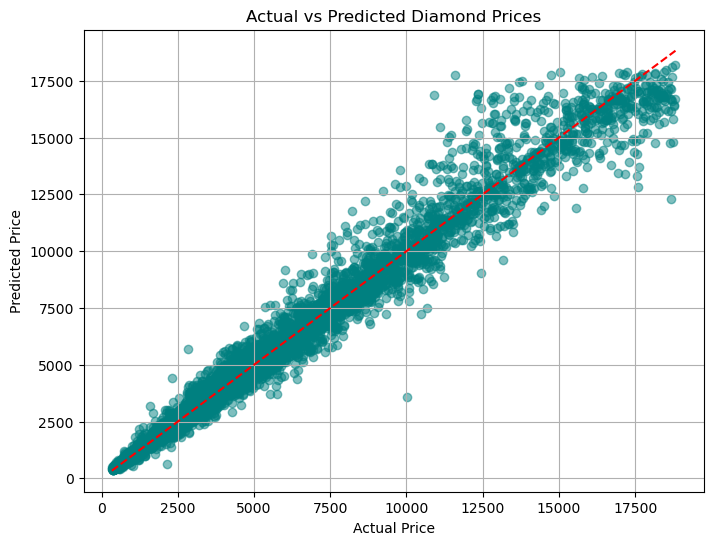

In [69]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='teal')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Diamond Prices")
plt.grid(True)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # 45-degree line
plt.show()


✅ So What This Plot Tells You:<br>
🔹 If most of the blue dots are near the red line →
🎯 Your model is doing a great job!

🔹 If dots are spread too far away from the line →
❌ Your model is making many mistakes